In [1]:
import SkelInt
import matplotlib.pyplot as plt



img_bin_1,img_gray_1, img_skel_1, graph_1, img_graph_1, contour_1 = SkelInt.load_data('img_Testes2.png','img_Testes2.tiff')#image_aug_test_




Could not load skeleton library. Unable to calculate skeletons.


In [2]:
  
k = 50          # Number of contour points to analyse for each skeleton pixel
radius = 10      # Radius of the background region to get for each skeleton pixel



# `point_map` é um dicionário no qual cada chave é o índice de um pixel do esqueleto, e 
# o valor associado a cada chave é uma tupla com os dois índices dos pixeis de contorno
# associados ao pixel de esqueleto

# `img` é a imagem em nível de cinza
# `int_dict` é um dicionário no qual cada chave é o índice de um pixel de esqueleto. 
# O valor associado a cada chave possui as intensidades do vaso e fundo do respectivo
# pixel de esqueleto, e também os índices dos pixeis de onde essas intensidades foram 
# obtidas
# int_dict = get_intensities(img, graph, contour, point_map, radius)

point_map_n_1 = SkelInt.get_closest_points2(graph_1, contour_1, k)
int_dict_n_1 = SkelInt.get_intensities2(img_gray_1,img_bin_1, graph_1, contour_1, point_map_n_1, radius)





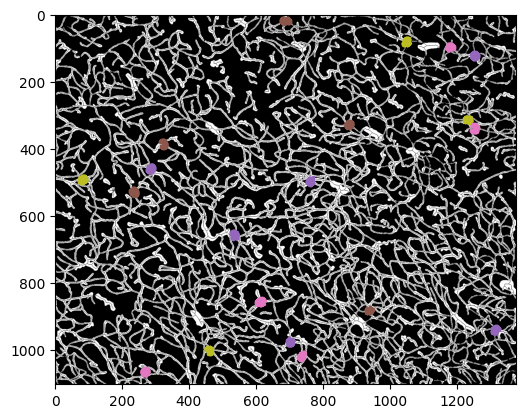

In [3]:

SkelInt.plot_sampling_regions(int_dict_n_1, img_bin_1, img_graph_1, n=20)

In [4]:
ret_dict_1,diff_mean_1,diff_min_1,diff_norm_mean_1,diff_norm_min_1 = SkelInt.interpret2(int_dict_n_1)
ret_dict_n_1 = SkelInt.process_means(ret_dict_1,n=15)




print('*--- image 1 ----')
print(diff_mean_1)
print(diff_min_1)
print(diff_norm_mean_1)
print(diff_norm_min_1)
print('*-------')



*--- image 1 ----
15.419074879237481
-3.576576576576578
0.33036706062853066
-0.12515762925598994
*-------


In [5]:
ret_dict_1#

[[{'int_vessel_m': 26.0,
   'int_back_m': 21.140495867768596,
   'diff_p': 4.859504132231404,
   'diff_norm_p': 0.18690400508582322,
   'diff_norm_p_mean': 0.3121027906480338,
   'diff_norm_p_div_mean': 0.5657464903741741,
   'diff_norm_p_div_std': -0.4342535096258259},
  {'int_vessel_m': 26.2,
   'int_back_m': 21.05785123966942,
   'diff_p': 5.142148760330578,
   'diff_norm_p': 0.19626521985994572,
   'diff_norm_p_mean': 0.31717677868943833,
   'diff_norm_p_div_mean': 0.5940822898219538,
   'diff_norm_p_div_std': -0.40591771017804623},
  {'int_vessel_m': 24.333333333333332,
   'int_back_m': 21.036036036036037,
   'diff_p': 3.2972972972972947,
   'diff_norm_p': 0.1355053683820806,
   'diff_norm_p_mean': 0.3174330310838763,
   'diff_norm_p_div_mean': 0.4101660986548678,
   'diff_norm_p_div_std': -0.5898339013451321},
  {'int_vessel_m': 24.333333333333332,
   'int_back_m': 20.92105263157895,
   'diff_p': 3.4122807017543835,
   'diff_norm_p': 0.1402307137707281,
   'diff_norm_p_mean': 0.3

In [6]:
%matplotlib widget

limiar = 0.4
plt.close()
#image_process(img_bin,img_gray,graph,ret_dict,limiar)
SkelInt.image_process2(img_bin_1,img_gray_1,graph_1,ret_dict_n_1,limiar)


array([[42., 42., 34., ..., 18., 17., 18.],
       [33., 33., 31., ..., 17., 17., 18.],
       [18., 23., 27., ..., 16., 17., 19.],
       ...,
       [23., 25., 22., ..., 24., 27., 36.],
       [24., 25., 24., ..., 21., 26., 26.],
       [25., 26., 25., ..., 24., 24., 24.]])

In [7]:
#ret_dict_3

img_lv = SkelInt.get_segments(graph_1,ret_dict_n_1, img_gray_1, img_bin_1)
#iou = iou_lcr(ret_dict_n_1,img_lv,pred,limiar) //Esse deve ter um PRED, que é a saida de uma rede neural

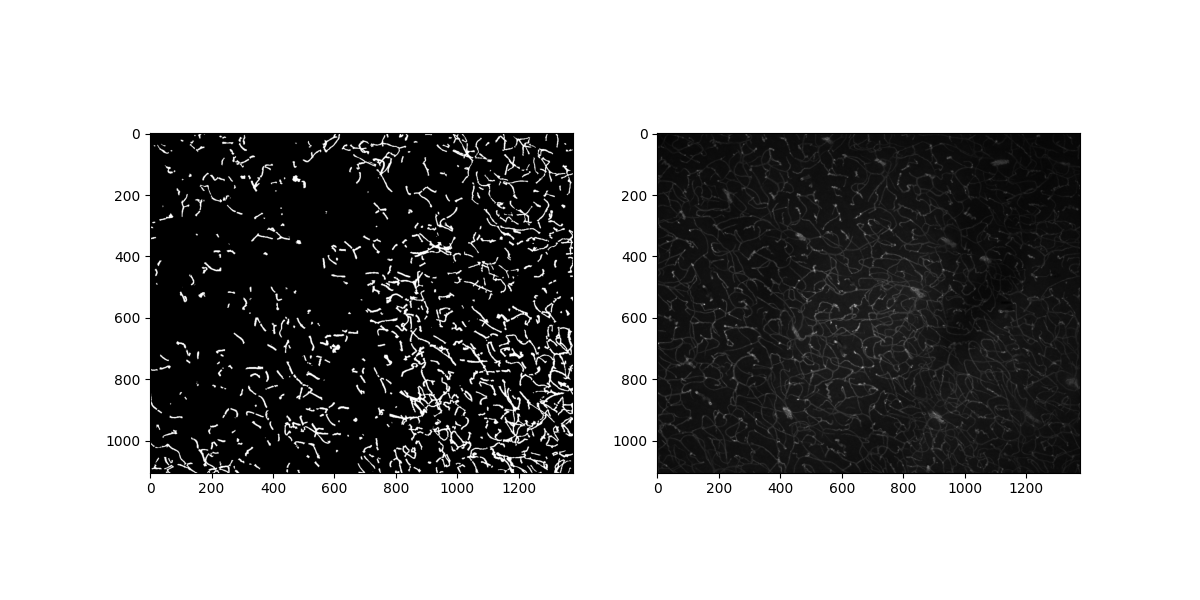

In [8]:

plt.close()
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.imshow((img_lv<0.3) & (img_lv!=0), 'gray')
plt.subplot(122)
plt.imshow(img_gray_1, 'gray')#,vmax = 30

In [9]:
img_lv.max()

0.6650640183202883

In [10]:
# ist_values_norm_p_1, hist_values_div_mean_1 = SkelInt.prepare_hist(ret_dict_1)



# plt.figure(figsize=(12,6))
# plt.subplot(121)
# plt.xlim(-1, 1)
# plt.hist(ist_values_norm_p_1,50)
# plt.subplot(122)
# plt.xlim(-5, 5)
# plt.hist(hist_values_div_mean_1,50)
# plt.show()





In [11]:
# %matplotlib widget
# k = 50          # Number of contour points to analyse for each skeleton pixel
# radius = 4      # Radius of the background region to get for each skeleton pixel

# limiar = 0.4
# teste = SkelInt.full_process_iou_unique('images/Experiment #3 (Adult set #2)_10x_batch2@22 Adult F1 C.png','images/Experiment #3 (Adult set #2)_10x_batch2@22 Adult F1 C.tiff',k,radius,limiar)

# plt.close()
# plt.figure(figsize=(12,6))
# plt.subplot(121)
# plt.imshow((teste<0.3) & (teste!=0), 'gray')